In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.linear_model import LinearRegression,Ridge,Lasso
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from sklearn.metrics import r2_score,max_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures,MinMaxScaler,StandardScaler
from statistics import mean
import datetime
from sklearn.svm import SVC
from scipy.optimize import curve_fit

In [65]:
import eli5
from eli5.sklearn import PermutationImportance

C:\Users\taraf\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\taraf\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)
Using TensorFlow backend.
C:\Users\taraf\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:526

In [3]:
data=pd.read_csv(r"C:\Datasets\bottle.csv")

C:\Users\taraf\anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (47,73) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
data.head()
data1=data.copy()

In [5]:
data.describe()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,...,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1
count,864863.000000,864863.000000,864863.000000,853900.000000,817509.000000,696201.000000,812174.000000,661274.000000,661268.000000,118667.000000,...,225276.000000,225275.000000,864863.000000,122006.000000,1999.000000,224.000000,2084.000000,234.000000,10.000000,84.000000
mean,17138.790958,432432.000000,226.831951,10.799677,33.840350,3.392468,25.819394,57.103779,148.808694,10.497426,...,0.450225,0.198599,228.395694,162.071521,2153.239714,2168.148330,2256.055845,2278.858803,7.948570,7.910983
std,10240.949817,249664.587269,316.050259,4.243825,0.461843,2.073256,1.167787,37.094137,90.187533,6.189688,...,1.208566,0.376539,319.456731,85.722796,112.995202,154.852332,34.844435,58.496495,0.021216,0.077666
min,1.000000,1.000000,0.000000,1.440000,28.431000,-0.010000,20.934000,-0.100000,-0.434900,0.000000,...,-0.010000,-3.890000,0.000000,0.000000,1948.850000,1969.440000,2181.570000,2198.150000,7.923100,7.618300
25%,8269.000000,216216.500000,46.000000,7.680000,33.488000,1.360000,24.965000,21.100000,60.915470,5.000000,...,0.050000,0.050000,46.000000,200.000000,2028.330000,2008.977500,2230.322500,2229.062500,7.931475,7.898675
50%,16848.000000,432432.000000,125.000000,10.060000,33.863000,3.440000,25.996000,54.400000,151.064150,10.000000,...,0.160000,0.110000,126.000000,206.000000,2170.640000,2265.885000,2244.325000,2247.505000,7.946650,7.928850
75%,26557.000000,648647.500000,300.000000,13.880000,34.196900,5.500000,26.646000,97.600000,240.379600,16.000000,...,0.390000,0.230000,302.000000,214.000000,2253.810000,2315.525000,2278.505000,2316.452500,7.963300,7.955100
max,34404.000000,864863.000000,5351.000000,31.140000,37.034000,11.130000,250.784000,214.100000,485.701800,25.000000,...,66.110000,65.300000,5458.000000,424.000000,2367.800000,2364.420000,2434.900000,2437.000000,7.988300,8.047700


In [6]:
#myriad rows seen
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 74 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Cst_Cnt              864863 non-null  int64  
 1   Btl_Cnt              864863 non-null  int64  
 2   Sta_ID               864863 non-null  object 
 3   Depth_ID             864863 non-null  object 
 4   Depthm               864863 non-null  int64  
 5   T_degC               853900 non-null  float64
 6   Salnty               817509 non-null  float64
 7   O2ml_L               696201 non-null  float64
 8   STheta               812174 non-null  float64
 9   O2Sat                661274 non-null  float64
 10  Oxy_µmol/Kg          661268 non-null  float64
 11  BtlNum               118667 non-null  float64
 12  RecInd               864863 non-null  int64  
 13  T_prec               853900 non-null  float64
 14  T_qual               23127 non-null   float64
 15  S_prec           

In [7]:
data=data.sample(frac=0.2,random_state=42)

In [8]:
#removing object type data
for i in data1.columns:
    if data1[i].dtype=='object':
        del data[i]

In [9]:
for i in data.columns:
    data[i].fillna((data[i].mean()),inplace=True)

In [10]:
data.head()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,...,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1
246454,9450,246455,237,10.25,34.490,0.63,26.516,10.0,27.409020,10.501809,...,0.447305,0.197059,238,161.348361,2154.008493,2164.583247,2255.851425,2279.989535,7.9432,7.909611
204226,7799,204227,1150,3.76,34.610,0.60,27.509,8.2,26.078610,10.501809,...,0.447305,0.197059,1159,161.348361,2154.008493,2164.583247,2255.851425,2279.989535,7.9432,7.909611
34578,1119,34579,600,5.27,34.271,0.56,27.072,7.9,24.350390,10.501809,...,0.447305,0.197059,605,161.348361,2154.008493,2164.583247,2255.851425,2279.989535,7.9432,7.909611
63034,2091,63035,300,9.93,34.660,0.18,26.705,2.8,7.829708,10.501809,...,0.447305,0.197059,302,161.348361,2154.008493,2164.583247,2255.851425,2279.989535,7.9432,7.909611
275018,10558,275019,131,9.36,33.640,4.02,25.998,62.2,174.984000,10.501809,...,0.447305,0.197059,132,161.348361,2154.008493,2164.583247,2255.851425,2279.989535,7.9432,7.909611


In [11]:
label=data['Salnty']

In [14]:
data=data.drop(columns=['Salnty'],axis=1)

KeyError: "['Salnty'] not found in axis"

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172973 entries, 246454 to 839180
Data columns (total 69 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Cst_Cnt      172973 non-null  int64  
 1   Btl_Cnt      172973 non-null  int64  
 2   Depthm       172973 non-null  int64  
 3   T_degC       172973 non-null  float64
 4   O2ml_L       172973 non-null  float64
 5   STheta       172973 non-null  float64
 6   O2Sat        172973 non-null  float64
 7   Oxy_µmol/Kg  172973 non-null  float64
 8   BtlNum       172973 non-null  float64
 9   RecInd       172973 non-null  int64  
 10  T_prec       172973 non-null  float64
 11  T_qual       172973 non-null  float64
 12  S_prec       172973 non-null  float64
 13  S_qual       172973 non-null  float64
 14  P_qual       172973 non-null  float64
 15  O_qual       172973 non-null  float64
 16  SThtaq       172973 non-null  float64
 17  O2Satq       172973 non-null  float64
 18  ChlorA       172973

In [53]:
features =['Depthm', 'T_degC','O2ml_L', 'STheta','O2Sat', 'Oxy_µmol/Kg','PO4uM', 'SiO3uM','NH3uM','R_Depth', 'R_TEMP', 'R_POTEMP',
        'R_SIGMA', 'R_SVA', 'R_DYNHT', 'R_O2', 'R_O2Sat','R_SIO3', 'R_PO4', 'R_NO3','R_PRES']

In [54]:
data_final=data[features]

In [38]:
q1=data_final.quantile(0.25)
q2=data_final.quantile(0.75)
IQR=q2-q1
print(IQR)

Depthm         253.00000
T_degC           6.09000
O2ml_L           3.34000
STheta           1.58800
O2Sat           56.50000
Oxy_µmol/Kg    134.61658
PO4uM            0.00000
SiO3uM           0.00000
NH3uM            0.00000
R_Depth        253.00000
R_TEMP           6.09000
R_POTEMP         5.78000
R_SALINITY       0.67700
R_SIGMA          1.59300
R_SVA          147.40000
R_DYNHT          0.46000
R_O2             3.34000
R_O2Sat         57.20000
R_SIO3           0.00000
R_PO4            0.00000
R_NO3            0.00000
R_PRES         255.00000
dtype: float64


In [39]:
dataTF=(data_final<(q1-1.5*IQR))|(data_final>(q2+1.5*IQR))
for col in dataTF.columns:#displaying the outlier frequencies
    outlier_count=dataTF[col].value_counts()
    print(outlier_count)

False    162136
True      10837
Name: Depthm, dtype: int64
False    172129
True        844
Name: T_degC, dtype: int64
False    172973
Name: O2ml_L, dtype: int64
False    172803
True        170
Name: STheta, dtype: int64
False    172972
True          1
Name: O2Sat, dtype: int64
False    172972
True          1
Name: Oxy_µmol/Kg, dtype: int64
False    90131
True     82842
Name: PO4uM, dtype: int64
False    101980
True      70993
Name: SiO3uM, dtype: int64
False    160039
True      12934
Name: NH3uM, dtype: int64
False    162136
True      10837
Name: R_Depth, dtype: int64
False    172129
True        844
Name: R_TEMP, dtype: int64
False    171912
True       1061
Name: R_POTEMP, dtype: int64
False    172268
True        705
Name: R_SALINITY, dtype: int64
False    172808
True        165
Name: R_SIGMA, dtype: int64
False    172785
True        188
Name: R_SVA, dtype: int64
False    167771
True       5202
Name: R_DYNHT, dtype: int64
False    172973
Name: R_O2, dtype: int64
False    172972
True   

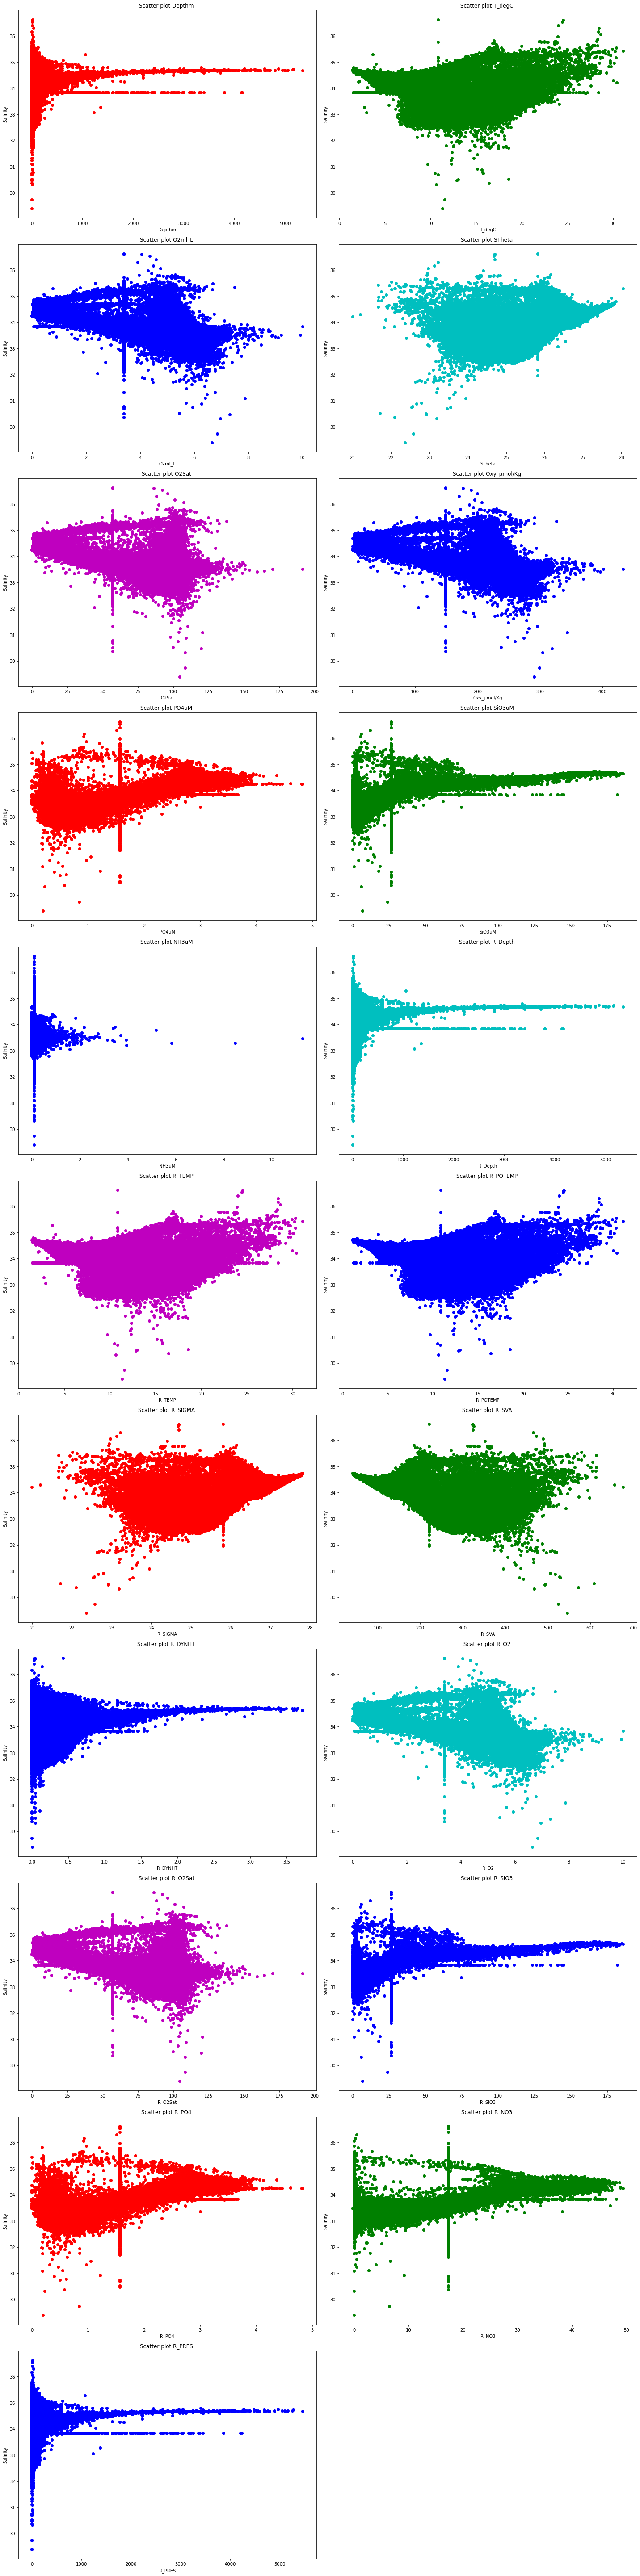

In [75]:
plt.figure(figsize=[20,80])
col=16*['r','g','b','c','m','b']
for i in range(0,21):
    plt.subplot(11,2,i+1)
    plt.tight_layout()
    plt.scatter(data_final[data_final.columns[i]],label,c=col[i])
    plt.title('Scatter plot {} '.format(data_final.columns[i]))
    plt.ylabel('Salinity')
    plt.xlabel(data_final.columns[i])

In [29]:
cor_matrix=data_final.corr(method='pearson')

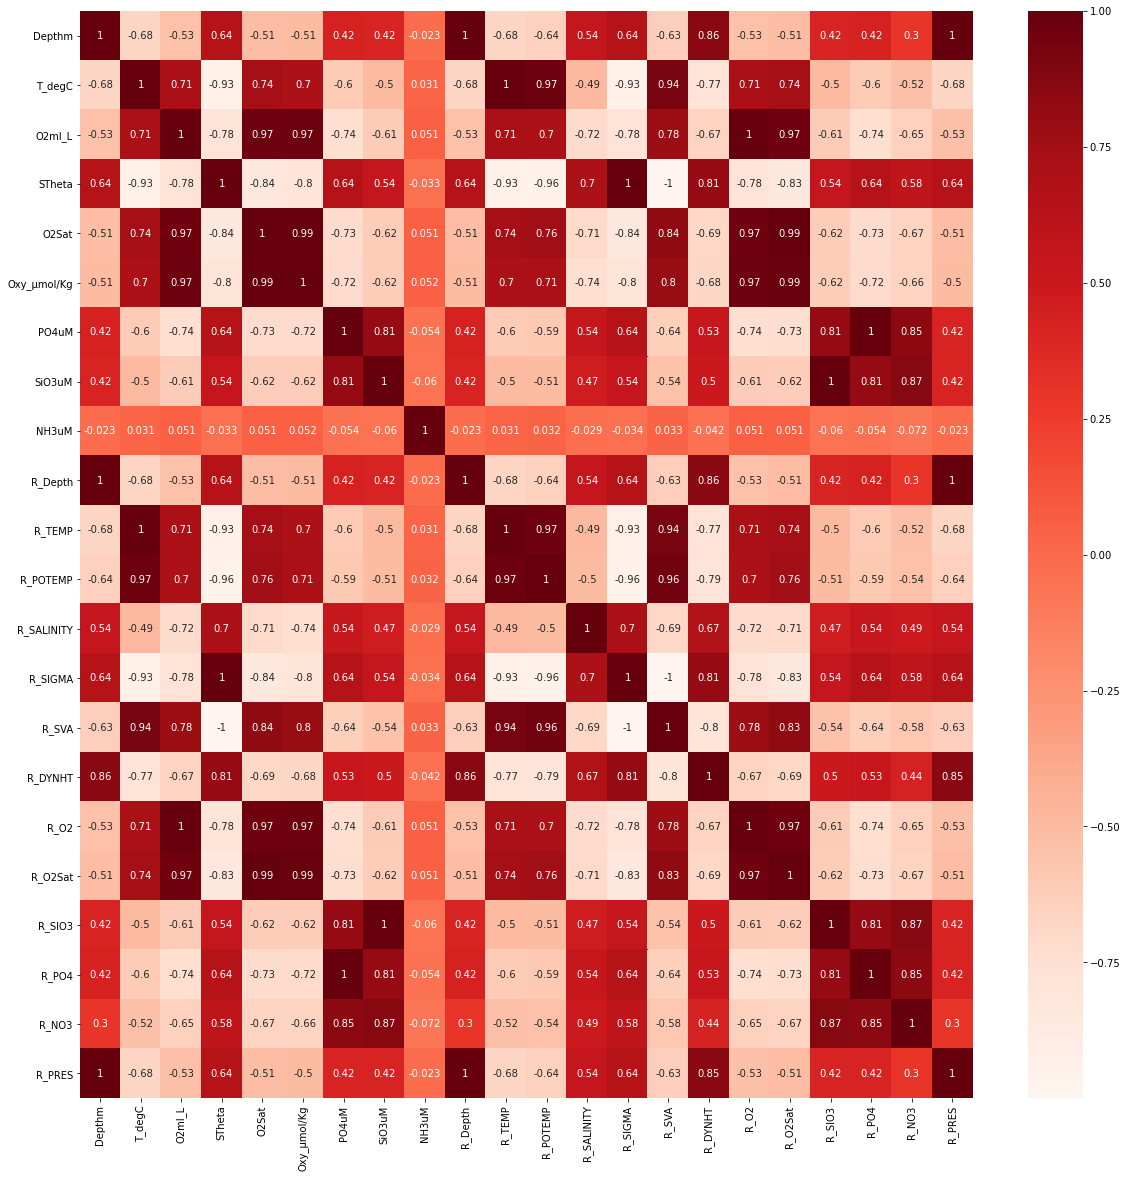

In [30]:
#cor heatmap
plt.figure(figsize=(20,20))
sns.heatmap(cor_matrix,annot=True,cmap=plt.cm.Reds)
plt.show()

In [70]:
xtrain,xtest,ytrain,ytest=train_test_split(data_final,label,test_size=0.25,random_state=42)
print(xtrain.shape,ytrain.shape,xtest.shape,ytest.shape)

(129729, 21) (129729,) (43244, 21) (43244,)


In [73]:
#Linear Regression Model
#Normalized data
lnr=LinearRegression(normalize=True)
lnr.fit(xtrain,ytrain)
pred=lnr.predict(xtest)
score=r2_score(ytest,pred)
print("R2 Score",score)
print("Max error",max_error(ytest,pred))
print("Coeffecient Values ",lnr.coef_)
print("Intercept Value ",lnr.intercept_)
error=abs(pred-ytest)
print("Mean absolute error (MAE):",round(np.mean(error),2),'degrees')

R2 Score 0.9417808979770043
Max error 2.9540202606007284
Coeffecient Values  [-0.01862503  0.42589662  0.91028927  0.38536964  0.02845078 -0.00860548
  0.83987138 -0.01989256  0.01336674  0.03331519 -0.39669776  0.1904052
 -0.66823118 -0.01488525  0.17509529 -0.91859242 -0.0070751   0.01872217
 -0.83165071  0.00384608 -0.01421975]
Intercept Value  41.9264730073818
Mean absolute error (MAE): 0.06 degrees


In [74]:
perm=PermutationImportance(lnr,random_state=42).fit(xtest,ytest)
eli5.show_weights(perm,feature_names=xtest.columns.tolist())

Weight,Feature
1042.9111 ± 7.1734,R_Depth
325.3119 ± 4.7230,Depthm
193.7719 ± 2.1812,R_PRES
31.9509 ± 0.2626,T_degC
29.0710 ± 0.2499,R_O2
28.5828 ± 0.2557,O2ml_L
27.7463 ± 0.2235,R_TEMP
18.0332 ± 0.0763,R_SVA
8.5027 ± 0.0469,O2Sat
6.0983 ± 0.0801,R_POTEMP


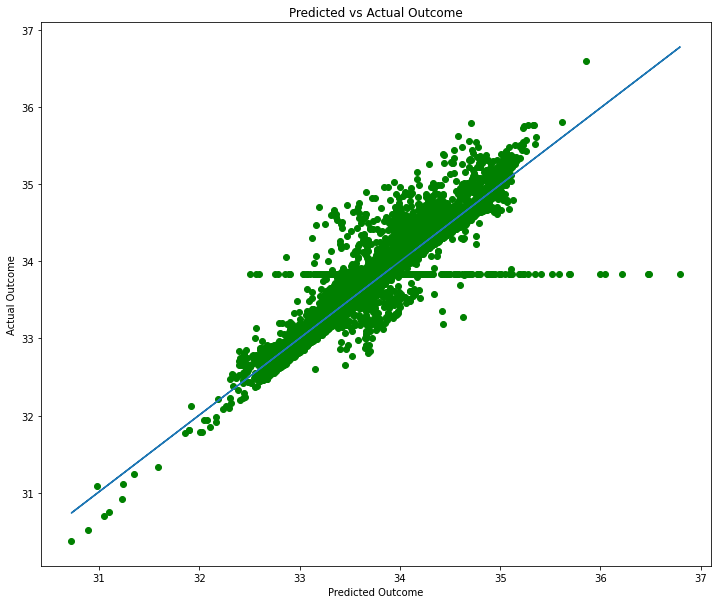

In [63]:
def slope(pred,ytest):
    m=(((mean(pred)*mean(ytest))-mean(pred*ytest))/((mean(pred)*mean(pred))-mean(pred*pred)))
    b=mean(ytest)-m*mean(pred)
    return m,b
m,b=slope(pred,ytest)
reg_line=[(m*x)+b for x in pred]
plt.figure(figsize=[12,10])
plt.title('Predicted vs Actual Outcome')
plt.xlabel('Predicted Outcome')
plt.ylabel('Actual Outcome')
plt.scatter(pred,ytest,c='g')
plt.plot(pred,reg_line)
plt.show()